<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/Naive_Bayes_Classifier_From_Scratch_Footsize_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

#View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [ ]:
import seaborn as sns

In [ ]:
P(data|class) = P(6.0 | Male)

SyntaxError: ignored

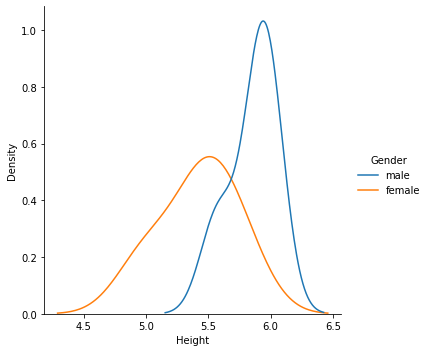

In [ ]:
sns.displot(data, x="Height", hue="Gender",kind="kde")

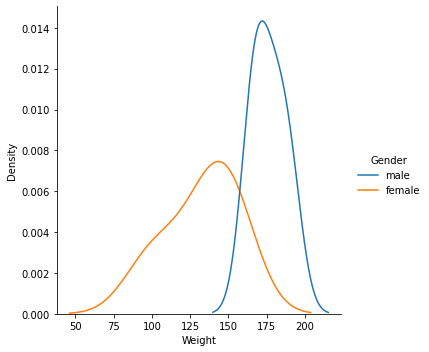

In [ ]:
sns.displot(data, x="Weight", hue="Gender", kind="kde")

In [ ]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


In [ ]:
#Number of males
n_male = data['Gender'][data['Gender']=='male'].count()

#Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

#Total rows
total_ppl = data['Gender'].count()

In [ ]:
#Number of males divided by the total rows
P_male = n_male/total_ppl

#Number of females divided by the total rows
P_female = n_female/total_ppl

In [16]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# view the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [14]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [18]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male 
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for male
female_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male 
female_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

In [20]:
# Create a function that calculates p(x|y):

def p_x_given_y(x, mean_y, variance_y):

# Input the arguments into a probability density function

  p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(-x-mean_y)**2)/(2*variance_y))

# return p
  return p

In [21]:
person

,Height,Weight,Foot_Size
0,6,130,8


In [22]:
# Numerator of the posterior if the unclassified observation is a male
P_male *\
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

0.0

In [23]:
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

0.0

In [24]:
P_male * \
p_x_given_y(data['Height'], male_height_mean, male_height_variance) * \
p_x_given_y(data['Weight'], male_weight_mean, male_weight_variance) * \
p_x_given_y(data['Foot_Size'], male_footsize_mean, male_footsize_variance)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
dtype: float64

In [25]:
# Numerator of the posterior if the unclassified observation is a female
P_female * \
p_x_given_y(data['Height'], female_height_mean, female_height_variance) * \
p_x_given_y(data['Weight'], female_weight_mean, female_weight_variance) * \
p_x_given_y(data['Foot_Size'], female_footsize_mean, female_footsize_variance)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
dtype: float64

In [26]:
gender_map = {'male':0, 'female':1}
data['Gender_Class'] = data.Gender.map(gender_map)

In [27]:
data

,Gender,Height,Weight,Foot_Size,Gender_Class
0,male,6.00,180,12,0
1,male,5.92,190,11,0
2,male,5.58,170,12,0
3,male,5.92,165,10,0
4,female,5.00,100,6,1
5,female,5.50,150,8,1
6,female,5.42,130,7,1
7,female,5.75,150,9,1


In [28]:
X = data.drop(['Gender', 'Gender_Class'], axis='columns')
y = data.Gender_Class

In [30]:
 #training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X, y) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
gnb.predict_proba(X)

array([[9.99998986e-01, 1.01445397e-06],
       [9.99983196e-01, 1.68038574e-05],
       [9.99922576e-01, 7.74235684e-05],
       [9.94264878e-01, 5.73512181e-03],
       [4.96397091e-27, 1.00000000e+00],
       [7.97744776e-06, 9.99992023e-01],
       [2.62668990e-12, 1.00000000e+00],
       [1.73074914e-02, 9.82692509e-01]])